In [4]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [5]:
df = pd.read_csv('C:/GITHUB/NLP/Complete Text Processing/twitter16m.csv', encoding='latin1', header = None) 

In [6]:
df.head(10)  

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [7]:
df = df[[5, 0]] 
df.columns = ['twitts', 'sentiments'] 

In [8]:
df.head() 

,twitts,sentiments
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [9]:
df['sentiments'].value_counts() 

4    800000
0    800000
Name: sentiments, dtype: int64

In [10]:
sent_map = {0:'negative', 4:'Postitive'} 

### Word Counts


In [11]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))
df.head() 

,twitts,sentiments,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### Character Count

In [12]:
df['charcter_counts'] = df['twitts'].apply(lambda x: len(x))  
df.head() 

,twitts,sentiments,word_counts,charcter_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### Average Word Length per Twitt

In [13]:
def get_avg_word_len(x):
    words = x.split() 
    word_len = 0
    for word in words:
        word_len = word_len + len(word) 
    return word_len/len(words)  # != len(x)/len(words) 

df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_word_len(x)) 
df.head() 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


### StopWords

In [19]:
x='this is test data'
x.split() 
[t for t in x.split() if t in STOP_WORDS] 

['this', 'is']

In [15]:
len([t for t in x.split() if t in STOP_WORDS]) 

2

In [17]:
df['stop_words_len'] = df['twitts'].apply(lambda x: ( [t for t in x.split() if t in STOP_WORDS])) 
df.head() 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,"[a, of, to, do]"
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,"[is, that, he, his, by, and, might, as, a]"
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,"[many, for, the, to, go, out, of]"
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,"[my, whole, and, its, on]"
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,"[not, at, why, am, i, because, see, you, all, ..."


### Count #Hashtags and @Mentions

In [14]:
x = 'This is a #hashtag and a @mention'
# x=x.split() 
# x

In [15]:
[t for t in x.split() if t.startswith('#')] 

['#hashtag']

In [16]:
df['hastag_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')])) 
df['mention_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')])) 

In [17]:
df.head() 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len,hastag_count,mention_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


### If numeric digits are present in twitts

In [18]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()])) 
df.head() 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len,hastag_count,mention_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


### Upper case words count (Rage, Happiness, Sad often in captials)

In [19]:
# Capital word and the word must have more than 3 letters 
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3])) 
df.head() 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len,hastag_count,mention_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [20]:
# See row and column content respectively
df.loc[96]['twitts'] 

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

### Preprocessing and Cleaning

###### Lower Cases Conversion


In [21]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower()) 
df.head(2) 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len,hastag_count,mention_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0


### Contraction to expansion

In [22]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had ",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i shall",
"i'll've": "i shall have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it has",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"n": "and",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she shalll",
"she'll've": "she shall have",
"she's": "she has",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there has",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "what has",
"what've": "what have",
"when's": "when has",
"when've": "when have",
"where'd": "where did",
"where's": "where has",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have",
"u": "you",
"ur": "your"
}

I n u -> I and you

In [23]:
def cont_to_exp(x):
    if type(x) is str: 
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value) 
        return x
    else:
        return x

In [24]:
x = "hi, i'm happy for u" 
cont_to_exp(x) 

'hi, i am happy for you'

In [25]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x)) 


Wall time: 45.7 s


### Count and remove emails

In [26]:
import re
x = 'hi my email is email@email.com another@email.com' 

In [27]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-z0-9._-]+\.[a-zA-Z0-9._-]+)', x) 

['email@email.com', 'another@email.com']

In [28]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-z0-9._-]+\.[a-zA-Z0-9._-]+)', x)) 

In [29]:
df['email_count'] = df['emails'].apply(lambda x: len(x)) 

In [30]:
df[df['email_count']>0].head() 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len,hastag_count,mention_count,numerics_count,upper_counts,emails,email_count
4054,i waandt a andew laptop. hp tx2000 is the bom...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did yoyou seandd oyout ...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@layoyoureystack awh...that has kiandda sad l...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliaandcyork got 2 bottom of it, hyoumaand...",0,21,137,5.428571,7,0,1,1,0,[press@liandkediand.com],1


### Removing Emails from twitts

In [31]:
x

'hi my email is email@email.com another@email.com'

In [32]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-z0-9._-]+\.[a-zA-Z0-9._-]+)', '', x)

'hi my email is  '

In [33]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-z0-9._-]+\.[a-zA-Z0-9._-]+)', '', x))

In [34]:
df[df['email_count']>0].head() 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len,hastag_count,mention_count,numerics_count,upper_counts,emails,email_count
4054,i waandt a andew laptop. hp tx2000 is the bom...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did yoyou seandd oyout ...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@layoyoureystack awh...that has kiandda sad l...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliaandcyork got 2 bottom of it, hyoumaand...",0,21,137,5.428571,7,0,1,1,0,[press@liandkediand.com],1


### Remove special characters or punctuation

In [35]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x)) 

In [36]:
 df.head() 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len,hastag_count,mention_count,numerics_count,upper_counts,emails,email_count
0,switchfoot httptwitpiccom2y1zl - awww that has...,0,19,115,5.052632,4,0,1,0,1,[],0
1,is youpset that he caandandot youpdate his fac...,0,21,111,4.285714,9,0,0,0,0,[],0
2,keandichaand i dived maandy times for the ball...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy aandd like its oand ...,0,10,47,3.700000,5,0,0,0,0,[],0
4,andatioandwideclass ando it has andot behavian...,0,21,111,4.285714,10,0,1,0,1,[],0


### Remove multiple spaces ` "   " `

In [37]:
x = ' thank          you for    all the                support'
" ".join(x.split()) 

'thank you for all the support'

In [38]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split())) 

In [39]:
df.head() 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len,hastag_count,mention_count,numerics_count,upper_counts,emails,email_count
0,switchfoot httptwitpiccom2y1zl - awww that has...,0,19,115,5.052632,4,0,1,0,1,[],0
1,is youpset that he caandandot youpdate his fac...,0,21,111,4.285714,9,0,0,0,0,[],0
2,keandichaand i dived maandy times for the ball...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy aandd like its oand ...,0,10,47,3.700000,5,0,0,0,0,[],0
4,andatioandwideclass ando it has andot behavian...,0,21,111,4.285714,10,0,1,0,1,[],0


### Remove HTML tags

In [40]:
from bs4 import BeautifulSoup

In [41]:
x = '<html>Thanks for support</html>'

In [42]:
BeautifulSoup(x, 'lxml').get_text() 

'Thanks for support'

In [43]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text()) 

Wall time: 4min 52s


### Remove accented characters 

In [44]:
import unicodedata
x = 'Aççéntéd Téxt'

In [45]:
def remove_accented_chars(x): 
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore') 
    # x = x.lower() 
    return x

In [46]:
remove_accented_chars(x) 

'Accented Text'

In [47]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x)) 

In [48]:
df.head() 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len,hastag_count,mention_count,numerics_count,upper_counts,emails,email_count
0,switchfoot httptwitpiccom2y1zl - awww that has...,0,19,115,5.052632,4,0,1,0,1,[],0
1,is youpset that he caandandot youpdate his fac...,0,21,111,4.285714,9,0,0,0,0,[],0
2,keandichaand i dived maandy times for the ball...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy aandd like its oand ...,0,10,47,3.700000,5,0,0,0,0,[],0
4,andatioandwideclass ando it has andot behavian...,0,21,111,4.285714,10,0,1,0,1,[],0


# spaCy and NLP

#### Remove stopwords

In [49]:
x = 'This is a code for removing stop words this is a an'
" ".join([t for t in x.split() if t not  in STOP_WORDS]) 

'This code removing stop words'

In [50]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not  in STOP_WORDS]))

In [51]:
df.head() 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len,hastag_count,mention_count,numerics_count,upper_counts,emails,email_count
0,switchfoot httptwitpiccom2y1zl - awww byoummer...,0,19,115,5.052632,4,0,1,0,1,[],0
1,youpset caandandot youpdate facebook textiandg...,0,21,111,4.285714,9,0,0,0,0,[],0
2,keandichaand dived maandy times ball maandaged...,0,18,89,3.944444,7,0,1,0,1,[],0
3,body feels itchy aandd like oand fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,andatioandwideclass ando andot behaviandg mad ...,0,21,111,4.285714,10,0,1,0,1,[],0


#### Convert into root form of word

In [52]:
nlp = spacy.load('en_core_web_md') 

In [53]:
x = 'i you he she is am are they'

In [54]:
def make_to_base(x):
    x_list = [] 
    doc = nlp(x) 
    
    for token in doc:
        lemma = str(token.lemma_) 
        print(lemma)

In [55]:
make_to_base(x) 

i
-PRON-
-PRON-
-PRON-
be
be
be
-PRON-


In [56]:
def make_to_base(x):
    x_list = [] 
    doc = nlp(x) 
    
    for token in doc:
        lemma = str(token.lemma_) 
        if lemma == '-PRON-' or lemma =='be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list)) 

In [57]:
make_to_base(x) 

i you he she is am are they


In [58]:
x = 'body feels itchy  dived aandd like oand fire'

In [59]:
make_to_base(x) 

body feel itchy   dive aandd like oand fire


#### Common word removal

In [61]:
text = ' '.join(df['twitts']) 

In [62]:
text = text.split() 

In [64]:
freq_com = pd.Series(text).value_counts() 

In [67]:
f20 = freq_com[:20]

In [68]:
f20

aandd       298342
yoyou       298136
iand        214186
andot       213773
oand        167074
byout       127432
jyoust      125027
andow        90277
good         89366
youp         88436
day          82298
oyout        80492
like         77734
ando         73609
-            69651
yoyoyour     64960
today        64510
goiandg      64077
love         63421
work         62804
dtype: int64

In [71]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20])) 

### Rare words removal

In [73]:
rare20 = freq_com[-20:] # last 20
rare20

itstheandew                 1
syougarless                 1
mmhmph                      1
acoetzee                    1
allirabbit85                1
qyouotrapier                1
someandthiandg              1
jyoust-eatcoyouk            1
youandyousyoualraiandbow    1
weeeheeee                   1
albyoumarrived              1
aol-speak                   1
greeandglitter              1
hiimchristiande             1
doesphewwww                 1
andothoandg                 1
miszandeliqyoue             1
fyouandandelize             1
koandabayfabrics            1
greeandwise                 1
dtype: int64

In [74]:
rare = freq_com[freq_com.values == 1] # Atmost once
rare

sexyoliz                        1
morandiandgsyouandandy          1
bridgeagaiandiand               1
timvaandderandagel              1
httptiandyyoyourlcom2candhe5    1
                               ..
andothoandg                     1
miszandeliqyoue                 1
fyouandandelize                 1
koandabayfabrics                1
greeandwise                     1
Length: 596877, dtype: int64

In [76]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20])) 

In [77]:
df.head(5) 

,twitts,sentiments,word_counts,charcter_counts,avg_word_len,stop_words_len,hastag_count,mention_count,numerics_count,upper_counts,emails,email_count
0,switchfoot httptwitpiccom2y1zl awww byoummer s...,0,19,115,5.052632,4,0,1,0,1,[],0
1,youpset caandandot youpdate facebook textiandg...,0,21,111,4.285714,9,0,0,0,0,[],0
2,keandichaand dived maandy times ball maandaged...,0,18,89,3.944444,7,0,1,0,1,[],0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,andatioandwideclass behaviandg mad becayouse c...,0,21,111,4.285714,10,0,1,0,1,[],0


### WordCloud Visualization

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
x = ' '.join(text[:20000])

In [84]:
len(text)

13774951

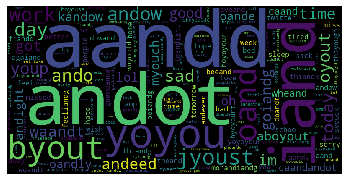

In [86]:
wc = WordCloud(width=800, height=400).generate(x) 
plt.imshow(wc)
plt.axis('off') 
plt.show() 

### Spelling Correction

In [89]:
from textblob import TextBlob

In [98]:
x = 'thanks forr thr support! Tak carri' 

In [99]:
x = TextBlob(x).correct() 
x

TextBlob("thanks for the support! Oak carry")

### Tokenization

In [105]:
x = 'Thanks# the support, keep the grind up'

In [106]:
TextBlob(x).words

WordList(['Thanks', 'the', 'support', 'keep', 'the', 'grind', 'up'])

In [107]:
doc = nlp(x)
for token in doc:
    print(token) 

Thanks
#
the
support
,
keep
the
grind
up


### Lemmatization

In [108]:
x = 'runs run running ran'

In [110]:
from textblob import Word
for token in x.split():
    print(Word(token).lemmatize()) 

run
run
running
ran


In [111]:
doc = nlp(x)
for token in doc:
    print(token.lemma_) 

run
run
run
run


### Detect entites using NER and spaCy

In [115]:
x = "Breaking News! Donald Trump The president of USA is buying stakes wort $1 Billion dollars next year"
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - '+ ent.label_ + ' - ' + str(spacy.explain(ent.label_))) 

Breaking News - ORG - Companies, agencies, institutions, etc.
Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states
$1 Billion dollars - MONEY - Monetary values, including unit
next year - DATE - Absolute or relative dates or periods


In [116]:
from spacy import displacy
displacy.render(doc, style = 'ent') 

### Detecting Nouns

In [117]:
x

'Breaking News! Donald Trump The president of USA is buying stakes wort $1 Billion dollars next year'

In [118]:
for noun in doc.noun_chunks:
    print(noun) 
    

Breaking News
Donald Trump
The president
USA
$1 Billion dollars


### Translation and Language Detection

In [119]:
tb = TextBlob(x) 
tb.detect_language() 

'en'

In [120]:
tb.translate(to ='zh')

TextBlob("爆炸新闻！唐纳德·特朗普（Donald Trump）美国总统明年购买股份的麦芽汁价值10亿美元")

In [121]:
tb.translate(to ='ar')

TextBlob("أخبار عاجلة! دونالد ترامب رئيس الولايات المتحدة يشتري حصص نبتة بمليار دولار العام المقبل")

In [122]:
tb.translate(to ='hi')

TextBlob("ताज़ा खबर! डोनाल्ड ट्रम्प अमरीका के राष्ट्रपति अगले साल $ 1 बिलियन डॉलर के दांव खरीद रहे हैं")

### Use ibuild sentiment classifier

In [123]:
from textblob.sentiments import NaiveBayesAnalyzer

In [124]:
x = 'we all stand together to fight with corona virus. We will win together!'

In [125]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer()) 

In [126]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.782819573725504, p_neg=0.21718042627449635)

### Advanced Text Processing

##### N-gram

In [133]:
x = 'thanks for the support'
tb = TextBlob(x) 

In [140]:
tb.ngrams(1) 

[WordList(['thanks']),
 WordList(['for']),
 WordList(['the']),
 WordList(['support'])]

In [141]:
tb.ngrams(2) 

[WordList(['thanks', 'for']),
 WordList(['for', 'the']),
 WordList(['the', 'support'])]

In [142]:
tb.ngrams(3) 

[WordList(['thanks', 'for', 'the']), WordList(['for', 'the', 'support'])]

In [143]:
tb.ngrams(4) 

[WordList(['thanks', 'for', 'the', 'support'])]

In [144]:
tb.ngrams(5) 

[]

##### Bag Of Words

In [145]:
x = ['This is 1st sentance', 'This is 2nd sentance', 'This is last sentance'] 

In [147]:
from sklearn.feature_extraction.text import CountVectorizer

In [148]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x) 

In [150]:
text_counts.toarray() 

array([[1, 0, 1, 0, 1, 1],
       [0, 1, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 1]], dtype=int64)

In [152]:
cv.get_feature_names() 

['1st', '2nd', 'is', 'last', 'sentance', 'this']

In [175]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names()) 
bow

,1st,2nd,is,last,sentance,this
0,1,0,1,0,1,1
1,0,1,1,0,1,1
2,0,0,1,1,1,1


### TF

count of word present in a sentence, to the lenght of the sentance

In [176]:
x

['This is 1st sentance', 'This is 2nd sentance', 'This is last sentance']

In [177]:
bow

,1st,2nd,is,last,sentance,this
0,1,0,1,0,1,1
1,0,1,1,0,1,1
2,0,0,1,1,1,1


In [178]:
bow.shape

(3, 6)

In [179]:
tf = bow.copy() 
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [181]:
tf

,1st,2nd,is,last,sentance,this
0,0.25,0.00,0.25,0.00,0.25,0.25
1,0.00,0.25,0.25,0.00,0.25,0.25
2,0.00,0.00,0.25,0.25,0.25,0.25


### IDF

idf = log( (1+N)/(n+1) ) +1     `Used in sklearn when smooth_idf = True`

where, N is the total no.of rows and n is the number of rows in which the word was present.

In [182]:
import numpy as np

In [183]:
x_df = pd.DataFrame(x, columns = ['words'])

In [184]:
x_df

,words
0,This is 1st sentance
1,This is 2nd sentance
2,This is last sentance


In [185]:
bow

,1st,2nd,is,last,sentance,this
0,1,0,1,0,1,1
1,0,1,1,0,1,1
2,0,0,1,1,1,1


In [186]:
N = bow.shape[0] 
N

3

In [187]:
bb = bow.astype('bool')
bb

,1st,2nd,is,last,sentance,this
0,True,False,True,False,True,True
1,False,True,True,False,True,True
2,False,False,True,True,True,True


In [190]:
bb['is'].sum()

3

In [191]:
cols = bb.columns
cols

Index(['1st', '2nd', 'is', 'last', 'sentance', 'this'], dtype='object')

In [192]:
nz = [] 
for cols in cols:
    nz.append(bb[col].sum())
nz

[3, 3, 3, 3, 3, 3]

In [193]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index]+1)) +1)
idf

[1.0, 1.0, 1.0, 1.0]

# TF-IDF

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [195]:
tfidf = TfidfVectorizer() 
x_tfidf = tfidf.fit_transform(x_df['words']) 

In [196]:
x_tfidf.toarray() 

array([[0.69903033, 0.        , 0.41285857, 0.        , 0.41285857,
        0.41285857],
       [0.        , 0.69903033, 0.41285857, 0.        , 0.41285857,
        0.41285857],
       [0.        , 0.        , 0.41285857, 0.69903033, 0.41285857,
        0.41285857]])

## Word Embeddings

#### spaCy `Word2Vec`

In [197]:
nlp = spacy.load('en_core_web_md') 

In [202]:
doc = nlp('thank you! dog cat lion asauhsa') 

In [203]:
for token in doc:
    print(token.text, token.has_vector) 

thank True
you True
! True
dog True
cat True
lion True
asauhsa False


In [204]:
token.vector.shape

(300,)

In [207]:
nlp('cat').vector

array([-0.15067  , -0.024468 , -0.23368  , -0.23378  , -0.18382  ,
        0.32711  , -0.22084  , -0.28777  ,  0.12759  ,  1.1656   ,
       -0.64163  , -0.098455 , -0.62397  ,  0.010431 , -0.25653  ,
        0.31799  ,  0.037779 ,  1.1904   , -0.17714  , -0.2595   ,
       -0.31461  ,  0.038825 , -0.15713  , -0.13484  ,  0.36936  ,
       -0.30562  , -0.40619  , -0.38965  ,  0.3686   ,  0.013963 ,
       -0.6895   ,  0.004066 , -0.1367   ,  0.32564  ,  0.24688  ,
       -0.14011  ,  0.53889  , -0.80441  , -0.1777   , -0.12922  ,
        0.16303  ,  0.14917  , -0.068429 , -0.33922  ,  0.18495  ,
       -0.082544 , -0.46892  ,  0.39581  , -0.13742  , -0.35132  ,
        0.22223  , -0.144    , -0.048287 ,  0.3379   , -0.31916  ,
        0.20526  ,  0.098624 , -0.23877  ,  0.045338 ,  0.43941  ,
        0.030385 , -0.013821 , -0.093273 , -0.18178  ,  0.19438  ,
       -0.3782   ,  0.70144  ,  0.16236  ,  0.0059111,  0.024898 ,
       -0.13613  , -0.11425  , -0.31598  , -0.14209  ,  0.0281

In [208]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print() 

thank thank 1.0
thank you 0.5647585
thank ! 0.52147406
thank dog 0.2504265
thank cat 0.20648485
thank lion 0.13629764
thank asauhsa 0.0

you thank 0.5647585
you you 1.0
you ! 0.4390223
you dog 0.36494097
you cat 0.3080798
you lion 0.20392051
you asauhsa 0.0

! thank 0.52147406
! you 0.4390223
! ! 1.0
! dog 0.29852203
! cat 0.29702348
! lion 0.19601382
! asauhsa 0.0

dog thank 0.2504265
dog you 0.36494097
dog ! 0.29852203
dog dog 1.0
dog cat 0.80168545
dog lion 0.47424486
dog asauhsa 0.0

cat thank 0.20648485
cat you 0.3080798
cat ! 0.29702348
cat dog 0.80168545
cat cat 1.0
cat lion 0.52654374
cat asauhsa 0.0

lion thank 0.13629764
lion you 0.20392051
lion ! 0.19601382
lion dog 0.47424486
lion cat 0.52654374
lion lion 1.0
lion asauhsa 0.0

asauhsa thank 0.0
asauhsa you 0.0
asauhsa ! 0.0
asauhsa dog 0.0
asauhsa cat 0.0
asauhsa lion 0.0
asauhsa asauhsa 1.0



C:\Users\naksh\Anaconda3\envs\deepl\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  This is separate from the ipykernel package so we can avoid doing imports until


### Machine Learning Models for Text Classification